In [65]:
import numpy as np
import pandas as pd
from pm4py.objects.log.importer.xes import importer as xes_importer
import pm4py

In [66]:
cluster = '5'
log = xes_importer.apply(f"C:\\Users\\ethan\\OneDrive - Dalhousie University\\Desktop\\RAD\\code\\16- Multiple clustering and embeddings\\exported clusters\\cluster_survived_{cluster}.xes")
traces = [[event["concept:name"] for event in trace] for trace in log]
flat_list = [item for sublist in traces for item in sublist]
events = np.unique(np.array(flat_list))

parsing log, completed traces ::   0%|          | 0/113 [00:00<?, ?it/s]

C:\Users\ethan\AppData\Local\Programs\Python\Python312\Lib\site-packages\pm4py\utils.py:541: UserWarning: the EventLog class has been deprecated and will be removed in a future release.
  warnings.warn("the EventLog class has been deprecated and will be removed in a future release.")


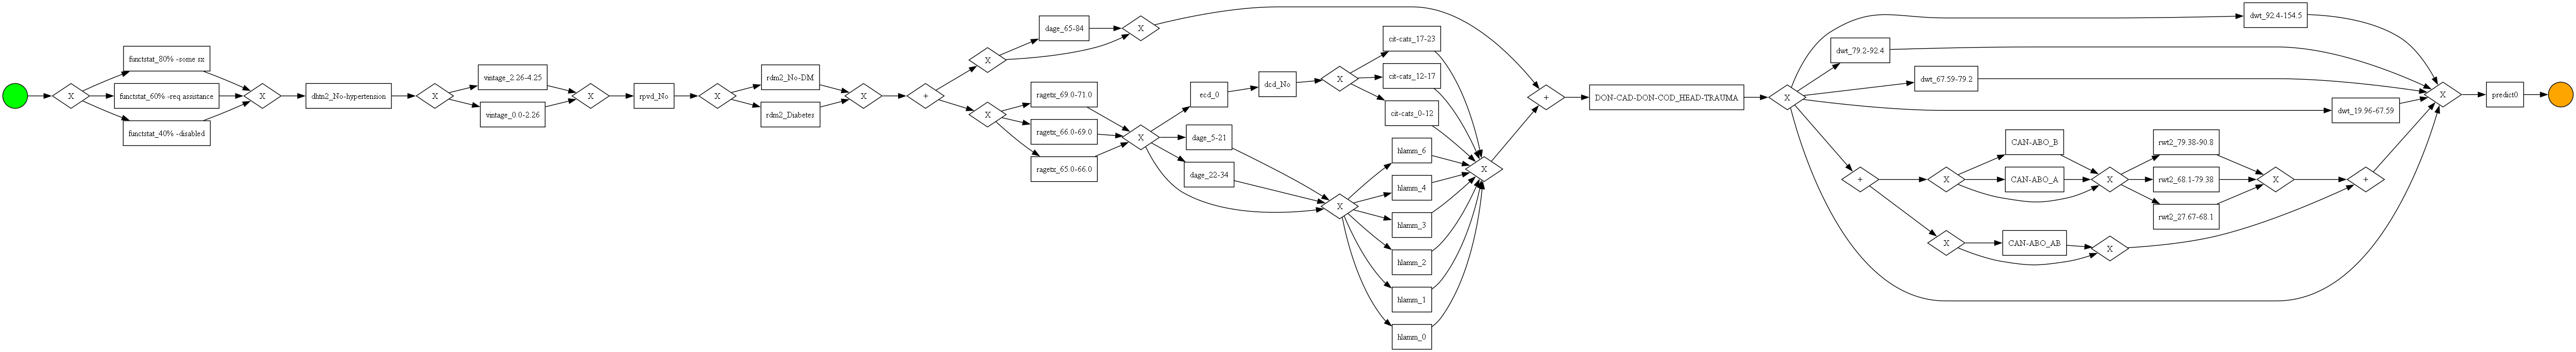

In [67]:
net, im, fm = pm4py.discover_petri_net_inductive(log)
bpmn_diagram = pm4py.convert_to_bpmn(net, im, fm)
pm4py.view_bpmn(bpmn_diagram)

In [54]:
df = pd.DataFrame(np.zeros((len(events),len(events))), columns=events, index=events)
df.head()

,CAN-ABO_A,CAN-ABO_AB,CAN-ABO_B,DON-CAD-DON-COD_HEAD-TRAUMA,cit-cats_0-12,cit-cats_12-17,cit-cats_17-23,dage_22-34,dage_5-21,dage_65-84,...,ragetx_66.0-69.0,ragetx_69.0-71.0,rdm2_Diabetes,rdm2_No-DM,rpvd_No,rwt2_27.67-68.1,rwt2_68.1-79.38,rwt2_79.38-90.8,vintage_0.0-2.26,vintage_2.26-4.25
CAN-ABO_A,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CAN-ABO_AB,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CAN-ABO_B,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
DON-CAD-DON-COD_HEAD-TRAUMA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
cit-cats_0-12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [55]:
for trace in traces:
    for i in range(len(trace)):
        for j in range(i, len(trace)):
            if trace[i] == trace[j]:
                continue
            df.loc[trace[i],trace[j]]+=1
            df.loc[trace[j],trace[i]]+=1

In [56]:
df.head()

,CAN-ABO_A,CAN-ABO_AB,CAN-ABO_B,DON-CAD-DON-COD_HEAD-TRAUMA,cit-cats_0-12,cit-cats_12-17,cit-cats_17-23,dage_22-34,dage_5-21,dage_65-84,...,ragetx_66.0-69.0,ragetx_69.0-71.0,rdm2_Diabetes,rdm2_No-DM,rpvd_No,rwt2_27.67-68.1,rwt2_68.1-79.38,rwt2_79.38-90.8,vintage_0.0-2.26,vintage_2.26-4.25
CAN-ABO_A,0.0,0.0,0.0,15.0,8.0,2.0,5.0,0.0,0.0,0.0,...,8.0,5.0,15.0,0.0,15.0,6.0,2.0,7.0,9.0,6.0
CAN-ABO_AB,0.0,0.0,0.0,7.0,4.0,2.0,1.0,0.0,0.0,0.0,...,3.0,0.0,7.0,0.0,7.0,0.0,4.0,3.0,6.0,1.0
CAN-ABO_B,0.0,0.0,0.0,6.0,2.0,2.0,2.0,0.0,0.0,0.0,...,1.0,2.0,6.0,0.0,6.0,2.0,2.0,2.0,3.0,3.0
DON-CAD-DON-COD_HEAD-TRAUMA,15.0,7.0,6.0,0.0,14.0,6.0,8.0,40.0,43.0,2.0,...,45.0,31.0,28.0,85.0,113.0,8.0,8.0,12.0,80.0,33.0
cit-cats_0-12,8.0,4.0,2.0,14.0,0.0,0.0,0.0,0.0,0.0,0.0,...,7.0,2.0,14.0,0.0,14.0,3.0,3.0,8.0,8.0,6.0


In [57]:
matrix = df.to_numpy()
np.sum(matrix - matrix.T)

0.0

In [58]:
df_abs = df.abs()

# optional global min-max across all values (for absolute corr this usually maps 0..max_abs->0..1)
min_val = df_abs.min().min()
max_val = df_abs.max().max()
df_abs_norm = (df_abs - min_val) / (max_val - min_val)

In [59]:
df_abs_norm.head()

,CAN-ABO_A,CAN-ABO_AB,CAN-ABO_B,DON-CAD-DON-COD_HEAD-TRAUMA,cit-cats_0-12,cit-cats_12-17,cit-cats_17-23,dage_22-34,dage_5-21,dage_65-84,...,ragetx_66.0-69.0,ragetx_69.0-71.0,rdm2_Diabetes,rdm2_No-DM,rpvd_No,rwt2_27.67-68.1,rwt2_68.1-79.38,rwt2_79.38-90.8,vintage_0.0-2.26,vintage_2.26-4.25
CAN-ABO_A,0.000000,0.000000,0.000000,0.132743,0.070796,0.017699,0.044248,0.000000,0.000000,0.000000,...,0.070796,0.044248,0.132743,0.000000,0.132743,0.053097,0.017699,0.061947,0.079646,0.053097
CAN-ABO_AB,0.000000,0.000000,0.000000,0.061947,0.035398,0.017699,0.008850,0.000000,0.000000,0.000000,...,0.026549,0.000000,0.061947,0.000000,0.061947,0.000000,0.035398,0.026549,0.053097,0.008850
CAN-ABO_B,0.000000,0.000000,0.000000,0.053097,0.017699,0.017699,0.017699,0.000000,0.000000,0.000000,...,0.008850,0.017699,0.053097,0.000000,0.053097,0.017699,0.017699,0.017699,0.026549,0.026549
DON-CAD-DON-COD_HEAD-TRAUMA,0.132743,0.061947,0.053097,0.000000,0.123894,0.053097,0.070796,0.353982,0.380531,0.017699,...,0.398230,0.274336,0.247788,0.752212,1.000000,0.070796,0.070796,0.106195,0.707965,0.292035
cit-cats_0-12,0.070796,0.035398,0.017699,0.123894,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.061947,0.017699,0.123894,0.000000,0.123894,0.026549,0.026549,0.070796,0.070796,0.053097


In [63]:
treshhold = df_abs_norm>0.8
events = []
for i in treshhold.columns:
    if np.sum(treshhold[i])>0:
        events.append(i)

In [64]:
events

['DON-CAD-DON-COD_HEAD-TRAUMA',
 'dhtn2_No-hypertension',
 'functstat_80% -some sx',
 'predict0',
 'rpvd_No']